# Machine learning mini-project 2
### Importing the libraries and loading the dataset

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import ssl
import string

# Connection function
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stop = stopwords.words("english")

In [172]:
df = pd.read_table("Sentiment140.tenPercent.sample.tweets.tsv")
df.head()

,sentiment_label,tweet_text
0,4,"@elephantbird Hey dear, Happy Friday to You A..."
1,4,Ughhh layin downnnn Waiting for zeina to co...
2,0,"@greeniebach I reckon he'll play, even if he's..."
3,0,@vaLewee I know! Saw it on the news!
4,0,very sad that http://www.fabchannel.com/ has c...


## Pre-processing the data

In [173]:
# Convert the text to lowercase
df['tweet_text'] = df['tweet_text'].apply(lambda x: x.lower())

In [174]:
# Remove punctuations
def remove_punctuations(text):
    translator = text.maketrans('', '', string.punctuation)
    return text.translate(translator)

df["tweet_text"] = df["tweet_text"].apply(remove_punctuations)

In [175]:
# Remove stopwords
df["tweet_text"] = df["tweet_text"].replace(stop, "")

In [176]:
# Create a new dataframe
df_2 = df.copy()

In [177]:
df.shape

(160000, 2)

## Logistic Regression, Machine Learning method 1


In [178]:
# Splitting into test and training data for method 1
X_train, X_test, y_train, y_test = train_test_split(df['tweet_text'], df['sentiment_label'], test_size=0.2, random_state=42)

In [179]:
# Vectorizing the data for method 1
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [180]:
# Tokenize the data to turn it into a list of words
df["tweet_text"] = df["tweet_text"].apply(word_tokenize)

In [181]:
#Stemming data for both methods

stemmer = PorterStemmer()
def apply_stemmer(text):
    return [stemmer.stem(word) for word in text]

df['tweet_text'] = df['tweet_text'].apply(apply_stemmer)

In [182]:
lr = LogisticRegression(n_jobs=-1, max_iter=10000)
lr.fit(X_train_vec, y_train)
y_pred_lr = lr.predict(X_test_vec)

In [183]:
# Print the accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Accuracy: 0.7793125


In [184]:
# Print the confusion matrix of the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Confusion Matrix:
 [[12201  3801]
 [ 3261 12737]]


In [185]:
# Print the classification report of the model
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78     16002
           4       0.77      0.80      0.78     15998

    accuracy                           0.78     32000
   macro avg       0.78      0.78      0.78     32000
weighted avg       0.78      0.78      0.78     32000



## Random Forest Classifier, Mahine learning method 2

In [150]:
# Splitting into test and training data for method 1
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_2['tweet_text'], df['sentiment_label'], test_size=0.2, random_state=42)

In [151]:
# Vectorizing the data for method 1
vectorizer_2 = TfidfVectorizer()
X_train_rf = vectorizer_2.fit_transform(X_train_2)
X_test_rf = vectorizer_2.transform(X_test_2)

In [152]:
# Scaling data to work better with the method.
sc = StandardScaler(with_mean=False)
X_train_rf = sc.fit_transform(X_train_rf)
X_test_rf = sc.transform(X_test_rf)

In [153]:
# Tokenize the data to turn it into a list of words
df_2["tweet_text"] = df_2["tweet_text"].apply(word_tokenize)

In [154]:
#Stemming data for method 2
df_2['tweet_text'] = df_2['tweet_text'].apply(apply_stemmer)

In [155]:
# 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_rf, y_train)
y_pred_rf = rf_model.predict(X_test_rf)

In [156]:
# Print the accuracy of the model
print('Accuracy of Random Forest Model:', accuracy_score(y_test_2, y_pred_rf))

Accuracy of Random Forest Model: 0.77153125


In [157]:
# Print the confusion matrix of the model
print('Confusion Matrix:\n', confusion_matrix(y_test_2, y_pred_rf))

Confusion Matrix:
 [[12781  3221]
 [ 4090 11908]]


In [158]:
# Print the classification report of the model
print('Classification Report:\n', classification_report(y_test_2, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78     16002
           4       0.79      0.74      0.77     15998

    accuracy                           0.77     32000
   macro avg       0.77      0.77      0.77     32000
weighted avg       0.77      0.77      0.77     32000



In [159]:
# Calculate evaluation metrics for Random Forest Classifier
rf_accuracy = accuracy_score(y_test_2, y_pred_rf)
rf_precision = precision_score(y_test_2, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test_2, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test_2, y_pred_rf, average='weighted')

In [160]:
# Calculate evaluation metrics for Logistic Regression
lr_accuracy = accuracy_score(y_test_2, y_pred_lr)
lr_precision = precision_score(y_test_2, y_pred_lr, average='weighted')
lr_recall = recall_score(y_test_2, y_pred_lr, average='weighted')
lr_f1 = f1_score(y_test_2, y_pred_lr, average='weighted')

## Visualizing and comparing the results

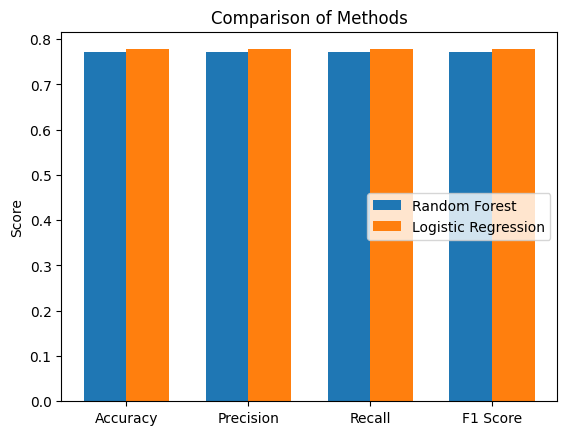

In [161]:
# Create a bar chart to compare the evaluation metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
rf_scores = [rf_accuracy, rf_precision, rf_recall, rf_f1]
lr_scores = [lr_accuracy, lr_precision, lr_recall, lr_f1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rf_scores, width, label='Random Forest')
rects2 = ax.bar(x + width/2, lr_scores, width, label='Logistic Regression')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Comparison of Methods')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc="center right")

plt.show()

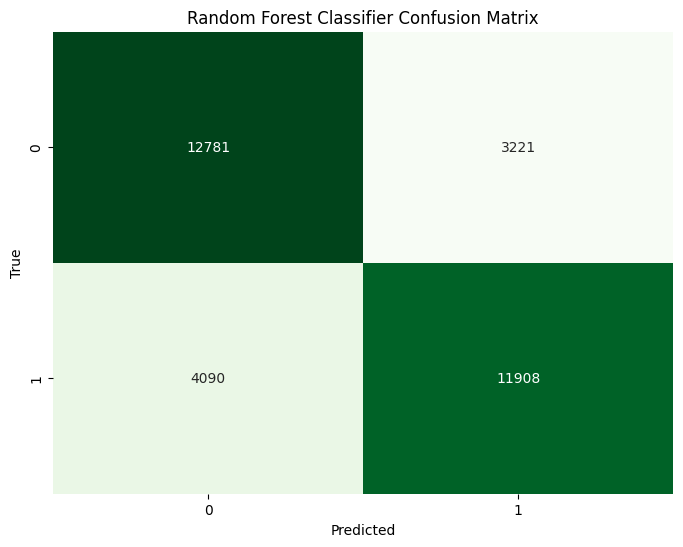

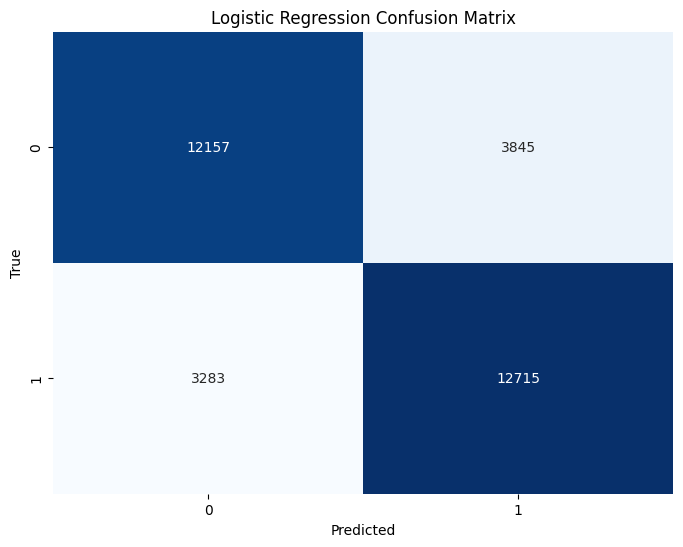

In [162]:
# Create confusion matrices for each model
rfc_cm = confusion_matrix(y_test, y_pred_rf)
lr_cm = confusion_matrix(y_test_2, y_pred_lr)

# Plot the confusion matrices
plt.figure(figsize=(8,6))
sns.heatmap(rfc_cm, annot=True, cmap='Greens', fmt='g', cbar=False)
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()